# <font color=blue>Assignments for "Performance Measurement Metrics"</font>

In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("../../data/logistic regression/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.drop(columns=['Name','Cabin'],inplace=True)
var_null=titanic.isnull().sum()
var_missing=var_null[var_null!=0].index
var_missing

Index(['Age', 'Embarked'], dtype='object')

In [4]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0])

In [5]:
titanic['Pclass']=titanic['Pclass'].astype("object")

var_numeric=titanic.select_dtypes(include=['float64','int64'])
var_cat=titanic.select_dtypes(include=['object'])
var_dummies=pd.get_dummies(var_cat,drop_first=True)

var_regress=pd.concat([var_numeric,var_dummies],axis=1)
var_regress.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Ticket_110413,...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
feature_cols = ['Age','SibSp','Fare','Parch','Pclass_2','Pclass_3','Sex_male','Embarked_Q','Embarked_S']
X = var_regress[feature_cols] # Features
Y=var_regress['Survived']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 6)

In [8]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)

train_accuracy = logreg.score(X_train, Y_train)
test_accuracy = logreg.score(X_test, Y_test)

print('Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy on Train Data : 0.79
Accuracy on Test Data  : 0.85


In [9]:
train_prediction = logreg.predict(X_train)
test_prediction = logreg.predict(X_test)

In [10]:
confusion_matrix_train = confusion_matrix(Y_train, train_prediction)
confusion_matrix_test = confusion_matrix(Y_test, test_prediction)

print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[323  52]
 [ 79 169]]


Confusion Matrix (Test Data)
------------------------------
[[162  12]
 [ 28  66]]


In [11]:
print(classification_report(Y_test, test_prediction))
print("f1_score() value        : {:.2f}".format(f1_score(Y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(Y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(Y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(Y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       174
           1       0.85      0.70      0.77        94

    accuracy                           0.85       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.85      0.85      0.85       268

f1_score() value        : 0.77
recall_score() value    : 0.70
precision_score() value : 0.85


Precision  : [0.85263158 0.84615385]
Recall     : [0.93103448 0.70212766]
F1 Score   : [0.89010989 0.76744186]


**ROC Curve**

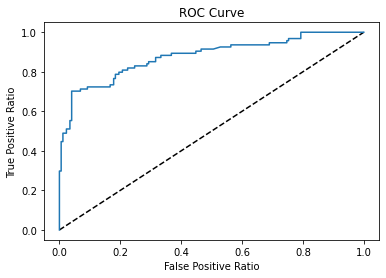

In [12]:
test_prediction_proba = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds  = roc_curve(Y_test, test_prediction_proba)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [13]:
print('AUC value : ', roc_auc_score(Y_test, test_prediction_proba))

AUC value :  0.878148691611641


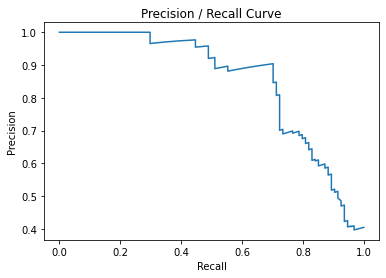

In [14]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(Y_test, test_prediction_proba)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()

In [15]:
print("Logarithmic Loss (log-loss) : " , log_loss(Y_test, test_prediction_proba))
print("Error Rate                  : " , 1- accuracy_score(Y_test, test_prediction))

Logarithmic Loss (log-loss) :  0.4005351847725507
Error Rate                  :  0.14925373134328357


In [16]:
C_values = [0.0001, 0.001,0.01, 0.1,1,10,100, 1000, 10000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='liblinear')
    lr.fit(X_train, Y_train)
    test_prediction = lr.predict(X_test)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, Y_train),
                                              'Test Accuracy': lr.score(X_test, Y_test),
                                              'Precision': precision_score(Y_test, test_prediction),
                                              'Recall': recall_score(Y_test, test_prediction)                                        
                                             }, ignore_index=True)
display(accuracy_values)    

,C_values,Train Accuracy,Test Accuracy,Precision,Recall
0,0.0001,0.658106,0.697761,0.638298,0.319149
1,0.0010,0.675762,0.723881,0.750000,0.319149
2,0.0100,0.712681,0.764925,0.918919,0.361702
3,0.1000,0.789727,0.839552,0.880597,0.627660
4,1.0000,0.789727,0.850746,0.846154,0.702128
5,10.0000,0.791332,0.843284,0.817073,0.712766
6,100.0000,0.791332,0.843284,0.817073,0.712766
7,1000.0000,0.791332,0.843284,0.817073,0.712766
8,10000.0000,0.791332,0.843284,0.817073,0.712766


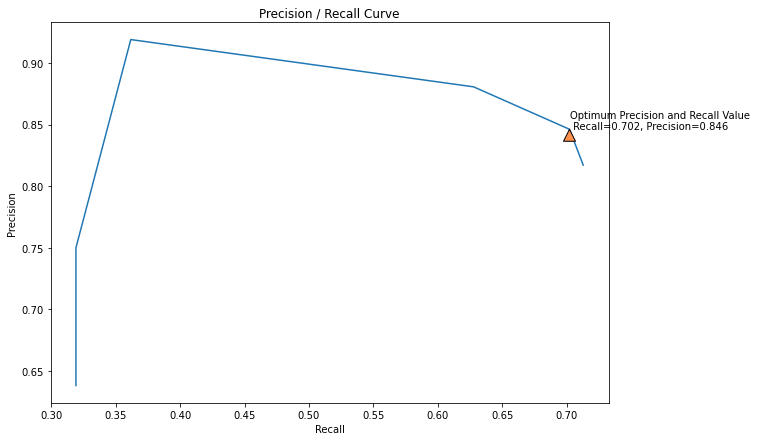

In [17]:
accuracy_values['Recall+Precision']=accuracy_values.Recall+accuracy_values.Precision

import numpy as np

Recall,Precision=accuracy_values.Recall, accuracy_values.Precision

plt.figure(figsize=(10,7))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')
text= "Optimum Precision and Recall Value \n Recall={:.3f}, Precision={:.3f}".format(accuracy_values.iloc[4,]['Recall'],accuracy_values.iloc[4,]['Precision'])
plt.annotate(text, xy=(accuracy_values.iloc[4,][['Recall','Precision']]), 
              xytext=(accuracy_values.iloc[4,][['Recall','Precision']]), arrowprops=dict(facecolor='#FF914D'))
plt.plot(Recall,Precision)

plt.show()